In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
import seaborn as sns
import os

In [8]:
# https://stackoverflow.com/questions/22348756/upright-mu-in-plot-label-retaining-original-tick-fonts
# https://stackoverflow.com/questions/2537868/sans-serif-math-with-latex-in-matplotlib

import matplotlib
from matplotlib import rc

matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family':'sans-serif'})

## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})

#params = {'text.latex.preamble':[r'\usepackage{siunitx}',
#                                 r'\usepackage{amsmath}',
#                                 r'\usepackage{physics}',
#                                 r'\usepackage{sfmath}',
#                                 r'\sisetup{detect-all=true}']}

params = {'text.latex.preamble':[r'\usepackage{siunitx}',
                                 r'\usepackage{amsmath}',
                                 r'\usepackage{physics}',
                                 r'\usepackage{helvet}',
                                 r'\usepackage{sansmath}',
                                 r'\sansmath',
                                 r'\sisetup{detect-all}']}
plt.rcParams.update(params)

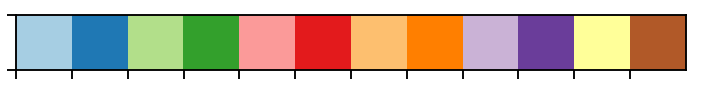

In [9]:
sns.palplot(sns.color_palette('Paired'))

# Rydberg molecule potential and wave function plot

In [10]:
# Function(s)
def g2(epsilon, x):
    return 1 + epsilon*np.exp(-2*np.pi*x**2)

### Read in data files

In [11]:
potential = np.genfromtxt('pot_87Sr_without_ion_atom_n34.txt', skip_header=2)
nu0 = np.genfromtxt('wvf_87Sr_without_ion_atom_n34-nu_0.txt',skip_header=2)
nu1 = np.genfromtxt('wvf_87Sr_without_ion_atom_n34-nu_1.txt',skip_header=1)
nu2 = np.genfromtxt('wvf_87Sr_without_ion_atom_n34-nu_2.txt',skip_header=1)
nu3 = np.genfromtxt('wvf_87Sr_without_ion_atom_n34-nu_3.txt',skip_header=1)
nu4 = np.genfromtxt('wvf_87Sr_without_ion_atom_n34-nu_4.txt',skip_header=1)

potential = pd.DataFrame(potential, columns=['R','E'])
nu0 = pd.DataFrame(nu0, columns=['R', 'RPsi', 'E'])
nu1 = pd.DataFrame(nu1, columns=['R', 'RPsi', 'E'])
nu2 = pd.DataFrame(nu2, columns=['R', 'RPsi', 'E'])
nu3 = pd.DataFrame(nu3, columns=['R', 'RPsi', 'E'])
nu4 = pd.DataFrame(nu4, columns=['R', 'RPsi', 'E'])

## Make plot with inset

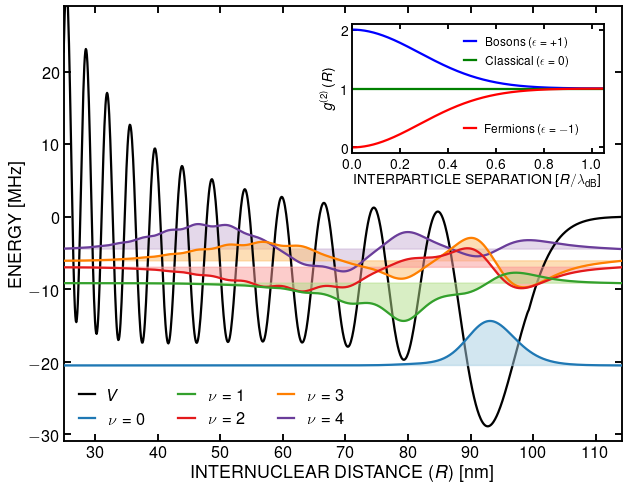

In [12]:
sns.set_context('talk')

# Insetting figure: https://stackoverflow.com/questions/21001088/how-to-add-different-graphs-as-an-inset-in-another-python-graph

# Major figure
fig, ax0 = plt.subplots(figsize=(10,8))

# Inset
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.525, 0.625, 0.35, 0.225]
ax1 = fig.add_axes([left, bottom, width, height])

##########################
# Major figure

# Arbitrary scaling of the wave functions heights
wvf_scale = 7E1

# [[DF, label, line color, fill_between color, alpha, scale factor, z order]]
nu_list = np.array([[nu0, r'$\nu=0$', sns.color_palette("Paired")[1], sns.color_palette("Paired")[0], 0.5, -1*wvf_scale, 5],
                    [nu1, r'$\nu=1$', sns.color_palette("Paired")[3], sns.color_palette("Paired")[2], 0.5, -1*wvf_scale, 4],
                    [nu2, r'$\nu=2$', sns.color_palette("Paired")[5], sns.color_palette("Paired")[4], 0.5, 1*wvf_scale, 3],
                    [nu3, r'$\nu=3$', sns.color_palette("Paired")[7], sns.color_palette("Paired")[6], 0.5, 1*wvf_scale, 2],
                    [nu4, r'$\nu=4$', sns.color_palette("Paired")[9], sns.color_palette("Paired")[8], 0.5, -1*wvf_scale, 1]])

#fig = plt.figure(figsize=(10,7))
#ax = plt.gca()

# Plotting the potential
#plt.plot(potential['R'], potential['E'], 'black', label='_nolegend_')
ax0.plot(potential['R'], potential['E'], 'black', label=r'$V$')

for nu, label, line_color, fill_color, alpha, scale, z_order in nu_list:
    ax0.plot(nu['R'], nu['RPsi']*scale + nu['E'], label=label, color=line_color, zorder=z_order+len(nu_list))
    ax0.fill_between(nu['R'], nu['E'], nu['RPsi']*scale + nu['E'], color=fill_color, alpha=alpha, zorder=z_order)

ax0.set_xlim((25, max(potential['R'])))
ax0.set_ylim((-31, 29))

# Axis options
ax0.tick_params(axis='both', which='both', direction='in', length=7)
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')

# Label options
ax0.set_ylabel(r'ENERGY [MHz]')
ax0.set_xlabel(r'INTERNUCLEAR DISTANCE ($R$) [nm]')

# Legend options
ax0.legend(ncol=3, handlelength=1, loc='lower left', frameon=False)

##########################
# Inset figure

x = np.linspace(0, 1.05, num=1000, endpoint=True)
y_boson = g2(1, x)
y_classical = g2(0, x)
y_fermion = g2(-1, x)

lines1 = ax1.plot(x, y_boson, label=r'Bosons ($\epsilon=+1$)', color='blue')
lines1 += ax1.plot(x, y_classical, label=r'Classical ($\epsilon=0$)', color='green')
lines2 = ax1.plot(x, y_fermion, label=r'Fermions ($\epsilon=-1$)', color='red')

ax1.set_xlabel(r'INTERPARTICLE SEPARATION [$R/\lambda_{\rm{dB}}$]', fontsize=14)
ax1.set_ylabel(r'$g^{\left(2\right)}\left(R\right)$', fontsize=14)

# Axis options
ax1.tick_params(axis='both', which='both', direction='in', length=5, labelsize=14)
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')

ax1.set_xlim(min(x), max(x))
ax1.set_ylim(-0.1, 2.1)

#plt.xticks([0, 0.25, 0.5, 0.75, 1])
#plt.yticks([0, 1, 2])

# Legend options
#ax1.legend(lines1, handlelength=1, frameon=False, loc='upper right', fontsize=12)
leg1 = Legend(ax1, lines1, [r'Bosons ($\epsilon=+1$)', r'Classical ($\epsilon=0$)'],
              handlelength=1, frameon=False, fontsize=12, loc=(0.425, 0.625))
leg2 = Legend(ax1, lines2, [r'Fermions ($\epsilon=-1$)'],
              handlelength=1, frameon=False, fontsize=12, loc=(0.425, 0.1))
ax1.add_artist(leg1)
ax1.add_artist(leg2)


##########################
# Saving

plt.savefig('Fig1.pdf', bbox_inches='tight', transparent=True)
#plt.savefig('Fig1.eps', format='eps', bbox_inches='tight')
#plt.savefig('n34_wavefunctions.png', bbox_inches='tight', dpi=1000, transparent=False)

plt.show()

# Old code below (with separate potential + wave function and g^2(R) plots)

### Make plot

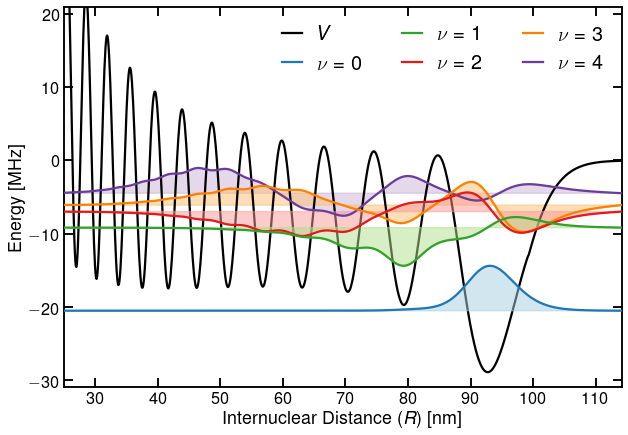

In [21]:
sns.set_context('talk')

# Arbitrary scaling of the wave functions heights
wvf_scale = 7E1

# [[DF, label, line color, fill_between color, alpha, scale factor, z order]]
nu_list = np.array([[nu0, r'$\nu=0$', sns.color_palette("Paired")[1], sns.color_palette("Paired")[0], 0.5, -1*wvf_scale, 5],
                    [nu1, r'$\nu=1$', sns.color_palette("Paired")[3], sns.color_palette("Paired")[2], 0.5, -1*wvf_scale, 4],
                    [nu2, r'$\nu=2$', sns.color_palette("Paired")[5], sns.color_palette("Paired")[4], 0.5, 1*wvf_scale, 3],
                    [nu3, r'$\nu=3$', sns.color_palette("Paired")[7], sns.color_palette("Paired")[6], 0.5, 1*wvf_scale, 2],
                    [nu4, r'$\nu=4$', sns.color_palette("Paired")[9], sns.color_palette("Paired")[8], 0.5, -1*wvf_scale, 1]])

fig = plt.figure(figsize=(10,7))
ax = plt.gca()

# Plotting the potential
#plt.plot(potential['R'], potential['E'], 'black', label='_nolegend_')
plt.plot(potential['R'], potential['E'], 'black', label=r'$V$')

for nu, label, line_color, fill_color, alpha, scale, z_order in nu_list:
    plt.plot(nu['R'], nu['RPsi']*scale + nu['E'], label=label, color=line_color, zorder=z_order+len(nu_list))
    plt.fill_between(nu['R'], nu['E'], nu['RPsi']*scale + nu['E'], color=fill_color, alpha=alpha, zorder=z_order)

plt.xlim(25, max(potential['R']))
plt.ylim(-31, 21)

# Axis options
ax.tick_params(axis='both', which='both', direction='in')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

# Label options
plt.ylabel(r'Energy [\si{\MHz}]')
plt.xlabel(r'Internuclear Distance ($R$) [\si{\nm}]')

# Legend options
plt.legend(ncol=3, handlelength=1, loc='upper right', frameon=False)

plt.savefig('n34_wavefunctions.pdf', bbox_inches='tight', transparent=True)
#plt.savefig('n34_wavefunctions.eps', format='eps', bbox_inches='tight')
#plt.savefig('n34_wavefunctions.png', bbox_inches='tight', dpi=1000, transparent=False)

plt.show()

# Making the g^(2) inset figure

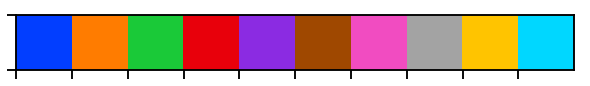

In [14]:
sns.palplot(sns.color_palette('bright'))

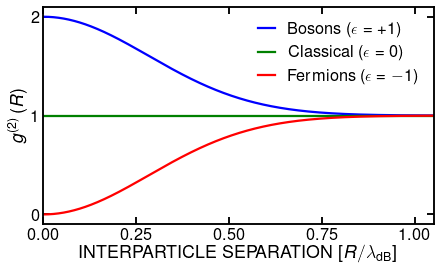

In [15]:
def g2(epsilon, x):
    return 1 + epsilon*np.exp(-2*np.pi*x**2)

sns.set_context('talk')

fig = plt.figure(figsize=(7,4))
ax = plt.gca()

x = np.linspace(0, 1.05, num=1000, endpoint=True)
y_boson = g2(1, x)
y_classical = g2(0, x)
y_fermion = g2(-1, x)

plt.plot(x, y_boson, label=r'Bosons ($\epsilon=+1$)', color='blue')
plt.plot(x, y_classical, label=r'Classical ($\epsilon=0$)', color='green')
plt.plot(x, y_fermion, label=r'Fermions ($\epsilon=-1$)', color='red')

plt.xlabel(r'INTERPARTICLE SEPARATION [$R/\lambda_{\rm{dB}}$]')
plt.ylabel(r'$g^{\left(2\right)}\left(R\right)$')

# Axis options
ax.tick_params(axis='both', which='both', direction='in', length=7)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

plt.xlim(min(x), max(x))
plt.ylim(-0.1, 2.1)

plt.xticks([0, 0.25, 0.5, 0.75, 1])
plt.yticks([0, 1, 2])

# Legend options
plt.legend(handlelength=1, frameon=False, loc='upper right')

plt.savefig('g2.pdf', bbox_inches='tight', transparent=False)
#plt.savefig('g2.eps', format='eps', bbox_inches='tight', transparent=False)

plt.show()